Pre-treatment data size before filtering: (1676, 18)
Pre-treatment data size after filtering: (1316, 18)
Post-treatment data size before filtering: (1680, 18)
Post-treatment data size after filtering: (1422, 18)
Weighted Pre-Treatment Speed: 17.36 mph
Weighted Post-Treatment Speed: 17.37 mph
T-Statistic: 1.335, P-Value: 0.182


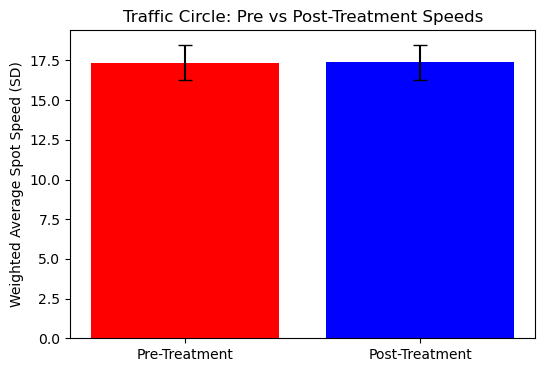

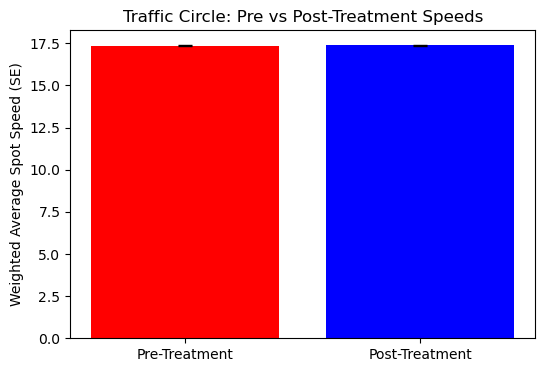

Highest value for pre-treatment'85th Speed Percentile': 27.0 mph Highest value for post-treatment'85th Speed Percentile': 29.0 mph
Row details:
Data Periods                                          Jun 01, 2021 - Jun 01, 2022
Mode of Travel                             All Vehicles - StL All Vehicles Volume
Zone ID                                                                       NaN
Zone Name                                                              5th Avenue
Zone Is Pass-Through                                                          yes
Zone Direction (degrees)                                                      180
Zone is Bi-Direction                                                          yes
Year-Month                                                                2021-07
Day Type                                                       3: Wednesday (W-W)
Day Part                                                    2: Peak AM (6am-10am)
Average Daily Spot Traffic (StL Volu

,Data Periods,Mode of Travel,Zone ID,Zone Name,Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,Day Part,Average Daily Spot Traffic (StL Volume),Avg Spot Speed (mph),Free Flow Speed (mph),Free Flow Factor,5th Speed Percentile,15th Speed Percentile,85th Speed Percentile,95th Speed Percentile
1035,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,5th Avenue (1),yes,180,yes,2022-03,4: Thursday (Th-Th),5: Late PM (7pm-12am),33,15.0,19.256,0.765,3.0,5.0,17.0,67.0
669,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,5th Avenue (1),yes,180,yes,2021-07,7: Sunday (Su-Su),3: Mid-Day (10am-3pm),41,19.0,22.657,0.841,7.0,11.0,22.0,65.0
658,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,5th Avenue (1),yes,180,yes,2021-07,5: Friday (F-F),4: Peak PM (3pm-7pm),65,18.0,22.657,0.793,6.0,7.0,22.0,62.0
1569,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,West 36th Street,yes,270,yes,2022-02,6: Saturday (Sa-Sa),1: Early AM (12am-6am),40,20.0,23.739,0.847,7.0,15.0,23.0,43.0
634,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,5th Avenue (1),yes,180,yes,2021-07,1: Monday (M-M),4: Peak PM (3pm-7pm),48,12.0,22.657,0.548,2.0,7.0,17.0,40.0
2001,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,West 36th Street (1),yes,270,yes,2021-11,6: Saturday (Sa-Sa),1: Early AM (12am-6am),42,18.0,21.677,0.830,6.0,10.0,31.0,38.0
1221,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,West 36th Street,yes,270,yes,2021-07,4: Thursday (Th-Th),1: Early AM (12am-6am),39,19.0,25.890,0.748,18.0,18.0,25.0,38.0
2043,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,West 36th Street (1),yes,270,yes,2021-12,5: Friday (F-F),1: Early AM (12am-6am),42,17.0,22.557,0.753,6.0,14.0,22.0,37.0
1425,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,West 36th Street,yes,270,yes,2021-11,6: Saturday (Sa-Sa),1: Early AM (12am-6am),41,19.0,23.596,0.789,10.0,10.0,23.0,36.0
1109,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,5th Avenue (1),yes,180,yes,2022-05,1: Monday (M-M),2: Peak AM (6am-10am),33,19.0,19.499,0.981,7.0,10.0,24.0,35.0


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

pre_treatment = pd.read_csv('data control/5th_control_pre.csv')
post_treatment = pd.read_csv('data control/5th_control_post.csv')

pre_filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
post_filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')

pre_treatment = pre_treatment[~pre_filters]
post_treatment = post_treatment[~post_filters]

def filter_outliers(df, column, threshold=3):
    valid_values = df[column].dropna()
    z_scores = stats.zscore(valid_values)
    valid_indices = valid_values.index[np.abs(z_scores) < threshold]
    return df.loc[valid_indices]

pre_treatment_filtered = filter_outliers(pre_treatment, '95th Speed Percentile')
post_treatment_filtered = filter_outliers(post_treatment, '95th Speed Percentile')

print("Pre-treatment data size before filtering:", pre_treatment.shape)
print("Pre-treatment data size after filtering:", pre_treatment_filtered.shape)
print("Post-treatment data size before filtering:", post_treatment.shape)
print("Post-treatment data size after filtering:", post_treatment_filtered.shape)

pre_speeds = pre_treatment_filtered['Avg Spot Speed (mph)']
post_speeds = post_treatment_filtered['Avg Spot Speed (mph)']
pre_volume = pre_treatment_filtered['Average Daily Spot Traffic (StL Volume)']
post_volume = post_treatment_filtered['Average Daily Spot Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

def weighted_std(values, weights):
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_std = weighted_std(pre_speeds, pre_volume)
post_weighted_std = weighted_std(post_speeds, post_volume)
pre_weighted_se = weighted_std(pre_speeds, pre_volume) / (len(pre_speeds) ** 0.5)
post_weighted_se = weighted_std(post_speeds, post_volume) / (len(post_speeds) ** 0.5)

valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_std, post_weighted_std], capsize=5, color=bar_colors)
plt.ylabel('Weighted Average Spot Speed (SD)')
plt.title('Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_se, post_weighted_se], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Spot Speed (SE)')
plt.title('Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

max_85th_speed_row_pre = pre_treatment_filtered.loc[pre_treatment_filtered['85th Speed Percentile'].idxmax()]
max_85th_speed_row_post = post_treatment_filtered.loc[post_treatment_filtered['85th Speed Percentile'].idxmax()]

max_85th_speed_value_pre = max_85th_speed_row_pre['85th Speed Percentile']
max_85th_speed_value_post = max_85th_speed_row_post['85th Speed Percentile']

print(f"Highest value for pre-treatment'85th Speed Percentile': {max_85th_speed_value_pre} mph",
     f"Highest value for post-treatment'85th Speed Percentile': {max_85th_speed_value_post} mph")
print("Row details:")
print(max_85th_speed_row_pre,max_85th_speed_row_post )
top_speed = pre_treatment.sort_values('95th Speed Percentile', ascending = False).head(10)
top_speed